# **Simulateur Intelligent d’Évaluation Immobilière**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement et Analyse Exploratoire des Données


- Charger les données avec `pandas`.


In [2]:
df=pd.read_csv("appartements.csv")

- Affiche les types de variables, le nombre de valeurs non nulles par colonne et l’espace mémoire utilisé.

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1773 entries, 0 to 1772
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1772 non-null   object 
 1   price         1490 non-null   object 
 2   city_name     1772 non-null   object 
 3   salon         1620 non-null   float64
 4   nb_rooms      1490 non-null   float64
 5   nb_baths      1480 non-null   float64
 6   surface_area  1742 non-null   float64
 7   equipment     1402 non-null   object 
 8   link          1773 non-null   object 
dtypes: float64(4), object(5)
memory usage: 124.8+ KB
None


- Affiche les 5 premières lignes du DataFrame pour avoir un aperçu rapide des données.

In [4]:
print(df.head())

                                               title         price  \
0       CMN-MA-1752 - Appartement à vendre à Palmier  2 000 000 DH   
1  66370-Vente Appt à Casablanca Hay Hassani de 1...  1 195 000 DH   
2           Appartement à vendre 81 m² à Dar Bouazza  1 350 000 DH   
3  63860-Vente Appt à Casablanca Quartier Bd Med ...    900 000 DH   
4                          Appartement à Rabat Agdal  3 100 000 DH   

     city_name  salon  nb_rooms  nb_baths  surface_area  \
0   Casablanca    NaN       2.0       2.0         168.0   
1   Casablanca    NaN       2.0       2.0          98.0   
2  Dar Bouazza    1.0       2.0       2.0          81.0   
3   Casablanca    NaN       1.0       1.0          56.0   
4        Rabat    2.0       3.0       2.0         200.0   

                                           equipment  \
0                  Ascenseur/Balcon/Parking/Terrasse   
1  Ascenseur/Balcon/Chauffage/Climatisation/Cuisi...   
2  Ascenseur/Balcon/Chauffage/Climatisation/Conci...   


## Comprendre la structure générale du jeu de **données**

-  Afficher  le types de chaque colonnes des donnés

In [5]:
print(df.dtypes)

title            object
price            object
city_name        object
salon           float64
nb_rooms        float64
nb_baths        float64
surface_area    float64
equipment        object
link             object
dtype: object


- Dimensions du jeu de données(colonnes,lines)


In [6]:
print("Dimensions du jeu de données :", df.shape)

Dimensions du jeu de données : (1773, 9)


- Liste tous les noms de colonnes du DataFrame.

In [7]:
print(df.columns)

Index(['title', 'price', 'city_name', 'salon', 'nb_rooms', 'nb_baths',
       'surface_area', 'equipment', 'link'],
      dtype='object')


-  identifier la somme des valeurs manquantes dans chaque colonne

In [8]:
print(df.isnull().sum())

title             1
price           283
city_name         1
salon           153
nb_rooms        283
nb_baths        293
surface_area     31
equipment       371
link              0
dtype: int64


- Identifier les valeurs doublons
- le nombre total de doublons

In [9]:
print(df.duplicated())
print('le nombre total de doublons:',df.duplicated().sum())

0       False
1       False
2       False
3       False
4       False
        ...  
1768    False
1769    False
1770    False
1771     True
1772     True
Length: 1773, dtype: bool
le nombre total de doublons: 41


- Supprimer les doublons

In [10]:
df.drop_duplicates()

,title,price,city_name,salon,nb_rooms,nb_baths,surface_area,equipment,link
0,CMN-MA-1752 - Appartement à vendre à Palmier,2 000 000 DH,Casablanca,NaN,2.0,2.0,168.0,Ascenseur/Balcon/Parking/Terrasse,https://www.avito.ma/fr/palmier/appartements/C...
1,66370-Vente Appt à Casablanca Hay Hassani de 1...,1 195 000 DH,Casablanca,NaN,2.0,2.0,98.0,Ascenseur/Balcon/Chauffage/Climatisation/Cuisi...,https://www.avito.ma/fr/hay_hassani/appartemen...
2,Appartement à vendre 81 m² à Dar Bouazza,1 350 000 DH,Dar Bouazza,1.0,2.0,2.0,81.0,Ascenseur/Balcon/Chauffage/Climatisation/Conci...,https://www.avito.ma/fr/dar_bouazza/appartemen...
3,63860-Vente Appt à Casablanca Quartier Bd Med ...,900 000 DH,Casablanca,NaN,1.0,1.0,56.0,Ascenseur/Chauffage/Climatisation/Cuisine Équi...,https://www.avito.ma/fr/centre_ville/apparteme...
4,Appartement à Rabat Agdal,3 100 000 DH,Rabat,2.0,3.0,2.0,200.0,Ascenseur/Balcon/Concierge/Parking/Sécurité,https://www.avito.ma/fr/agdal/appartements/App...
...,...,...,...,...,...,...,...,...,...
1766,Appartement location,3 500 DH,Tétouan,1.0,2.0,2.0,85.0,Ascenseur/Balcon/Cuisine Équipée/Meublé/Sécurité,https://www.avito.ma/fr/el_mdrassi/appartement...
1767,appartement 4 minutes tgv,700 000 DH,Tanger,1.0,2.0,1.0,70.0,Ascenseur/Balcon,https://www.avito.ma/fr/tanja_balia/appartemen...
1768,Appartement à vendre 62 m² à Agadir,NaN,Agadir,1.0,NaN,NaN,62.0,Ascenseur/Balcon/Cuisine Équipée/Parking/Sécurité,https://www.avito.ma/fr/cit%C3%A9_adrar/appart...
1769,Appartement 110 m² à Agadir,NaN,Agadir,2.0,NaN,NaN,110.0,Ascenseur/Parking,https://www.avito.ma/fr/av_des_far/appartement...


-  Afficher  des statistiques descriptives (moyenne, min, max, quartiles) des colonnes numériques

In [11]:
df.describe()

,salon,nb_rooms,nb_baths,surface_area
count,1620.000000,1490.000000,1480.000000,1742.000000
mean,1.267284,2.379195,2.307432,174.933410
std,0.557539,0.667159,7.629128,2969.500693
min,0.000000,1.000000,0.000000,1.000000
25%,1.000000,2.000000,1.000000,71.000000
50%,1.000000,2.000000,2.000000,89.000000
75%,1.000000,3.000000,2.000000,114.750000
max,8.000000,7.000000,134.000000,123456.000000


- Étudier les corrélations entre les variables (matrice de corrélation)

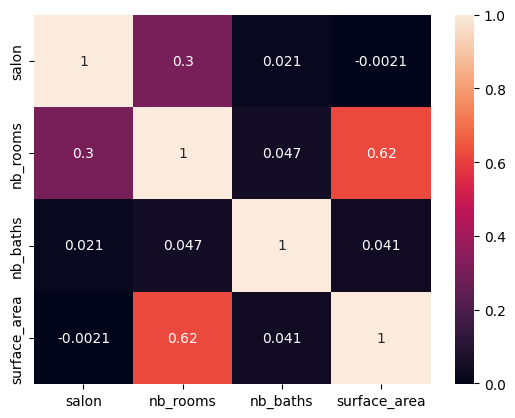

In [12]:
variablees_numeriques=df.select_dtypes(include=["number"]).columns.tolist()
sns.heatmap(df[variablees_numeriques].corr(), annot=True)
plt.show()

**Prétraitement des données**

- Extraire les équipements (`equipment`) en colonnes booléennes avec `str.get_dummies()

In [13]:
equipements_dummies=df['equipment'].str.get_dummies("/")
df = pd.concat([df.drop("equipment", axis=1), equipements_dummies], axis=1)
print(equipements_dummies)

      Ascenseur  Balcon  Chauffage  Climatisation  Concierge  Cuisine Équipée  \
0             1       1          0              0          0                0   
1             1       1          1              1          0                1   
2             1       1          1              1          1                1   
3             1       0          1              1          0                1   
4             1       1          0              0          1                0   
...         ...     ...        ...            ...        ...              ...   
1768          1       1          0              0          0                1   
1769          1       0          0              0          0                0   
1770          1       1          0              0          0                0   
1771          0       0          0              0          0                1   
1772          1       1          0              1          1                1   

      Duplex  Meublé  Parki

- Convertir la colonne `price` en `float` (suppression de caractères non numériques)

In [14]:
df['price']=df['price'].replace(r"[^\d.]", "", regex=True).astype(float)
print(df)

                                                  title      price  \
0          CMN-MA-1752 - Appartement à vendre à Palmier  2000000.0   
1     66370-Vente Appt à Casablanca Hay Hassani de 1...  1195000.0   
2              Appartement à vendre 81 m² à Dar Bouazza  1350000.0   
3     63860-Vente Appt à Casablanca Quartier Bd Med ...   900000.0   
4                             Appartement à Rabat Agdal  3100000.0   
...                                                 ...        ...   
1768                Appartement à vendre 62 m² à Agadir        NaN   
1769                        Appartement 110 m² à Agadir        NaN   
1770             Appartement à vendre 12000 m² à Temara        NaN   
1771                      appartement de 84 m² à vendre   700000.0   
1772                 Appartement Neuf à vendre à Temara  1200000.0   

        city_name  salon  nb_rooms  nb_baths  surface_area  \
0      Casablanca    NaN       2.0       2.0         168.0   
1      Casablanca    NaN       2.0 

- Supprimer les colonnes inutiles : `link`, `title`

In [15]:
df.drop(['link','title'], axis=1, inplace=True)

- Uniformiser les noms de villes dans `city_name`

1.   Afficher les noms de villes uniques présents dans la colonne 'city_name'
2.   Dictionnaire de correspondance : noms de villes en arabe ➜ noms en français
3.   Remplacer les noms de villes en arabe par leurs équivalents en français



In [16]:
print(df['city_name'].unique())

['Casablanca' 'Dar Bouazza' 'Rabat' 'Marrakech' 'Asilah' 'Bouskoura'
 'Kénitra' 'Mohammedia' 'Agadir' 'Tamesna' 'Salé' 'Had Soualem' 'Temara'
 'Benslimane' 'Tanger' 'Bouznika' 'Meknès' 'Fès' 'El Jadida'
 'El Mansouria' 'Martil' 'الدار البيضاء' 'Fnideq' 'Tétouan' 'Saidia'
 'Nouaceur' 'القنيطرة' 'Tamaris' 'طنجة' 'Cabo Negro'
 'Sidi Allal El Bahraoui' 'Béni Mellal' 'أكادير' nan 'Essaouira' 'Mehdia'
 'المحمدية' 'Oujda' 'Oued Laou' 'Dcheira' 'Sidi Rahal' 'Deroua' 'مراكش'
 'Ain Attig' 'Safi' 'الرباط' 'Inzegan' 'Ifrane' 'Dakhla'
 'Dcheïra El Jihadia' 'Taghazout' 'Sidi Bouknadel' 'Skhirat' 'Khouribga'
 'Berkane' 'Mers El Kheir' 'Berrechid' 'Tiznit' 'Agadir Melloul' 'Nador'
 'El Menzeh' 'Bni Ansar' 'Mdiq' 'Tit Mellil' 'Souk El Arbaa' 'Biougra'
 'Settat' 'Ain Aouda' 'Taza' 'Khemisset' 'Oued Zem' 'Sefrou' 'Merzouga'
 'El Hajeb' 'Selouane' 'Taounate' 'Sidi Bennour' 'El Ksiba']


In [17]:
ville_dict = {
    "الدار البيضاء": "Casablanca",
    "الرباط": "Rabat",
    "فاس": "Fès",
    "مراكش": "Marrakech",
    "طنجة": "Tanger",
    "أكادير": "Agadir",
    "مكناس": "Meknès",
    "وجدة": "Oujda",
    "تطوان": "Tétouan",
    "آسفي": "Safi",
    "القنيطرة": "Kénitra",
    "خريبكة": "Khouribga",
    "بني ملال": "Beni Mellal",
    "الناظور": "Nador",
    "الجديدة": "El Jadida",
    "تازة": "Taza",
    "تمارة": "Témara",
    "بركان": "Berkane",
    "سلا": "Salé",
    "العيون": "Laâyoune",
    "الراشيدية": "Errachidia",
    "ورزازات": "Ouarzazate",
    "سطات": "Settat",
    "تاوريرت": "Taourirt",
    "الصويرة": "Essaouira",
    "كلميم": "Guelmim",
    "الفقيه بن صالح": "Fquih Ben Salah",
    "المحمدية": "Mohammédia",
    "زاكورة": "Zagora",
    "سيدي قاسم": "Sidi Kacem",
    "سيدي سليمان": "Sidi Slimane",
    "اليوسفية": "Youssoufia"
}
df['city_name']=df['city_name'].replace(ville_dict)
print(df['city_name'])

0        Casablanca
1        Casablanca
2       Dar Bouazza
3        Casablanca
4             Rabat
           ...     
1768         Agadir
1769         Agadir
1770         Temara
1771     Casablanca
1772         Temara
Name: city_name, Length: 1773, dtype: object


**Traitement des valeurs manquantes**

- Supprimer les valeurs manquantes dans 'price'



In [18]:
df.dropna(subset=["price"], inplace=True)

 - identifier la somme des valeurs manquantes restantes dans DataFrame df



1.   On remplace les valeurs manquantes par "Unknown"
2.   Pour les variables numériques (sauf price), on remplace les valeurs manquantes par la médiane



In [19]:
df['city_name']=df['city_name'].fillna("Unknown")
colonnes_numeriques=df.select_dtypes(include=["number"]).drop(columns=['price']).columns.tolist()
for colom in colonnes_numeriques:
  df[colom]=df[colom].fillna(df[colom].median())



 - identifier la somme des valeurs manquantes restantes dans DataFrame df

In [20]:
df[df.isnull().any(axis=1)]

,price,city_name,salon,nb_rooms,nb_baths,surface_area,Ascenseur,Balcon,Chauffage,Climatisation,Concierge,Cuisine Équipée,Duplex,Meublé,Parking,Sécurité,Terrasse


**Détection et traitement des valeurs aberrantes**

-  visualiser les outliers présents dans les colonnes numériques de df

> Ajouter une citation



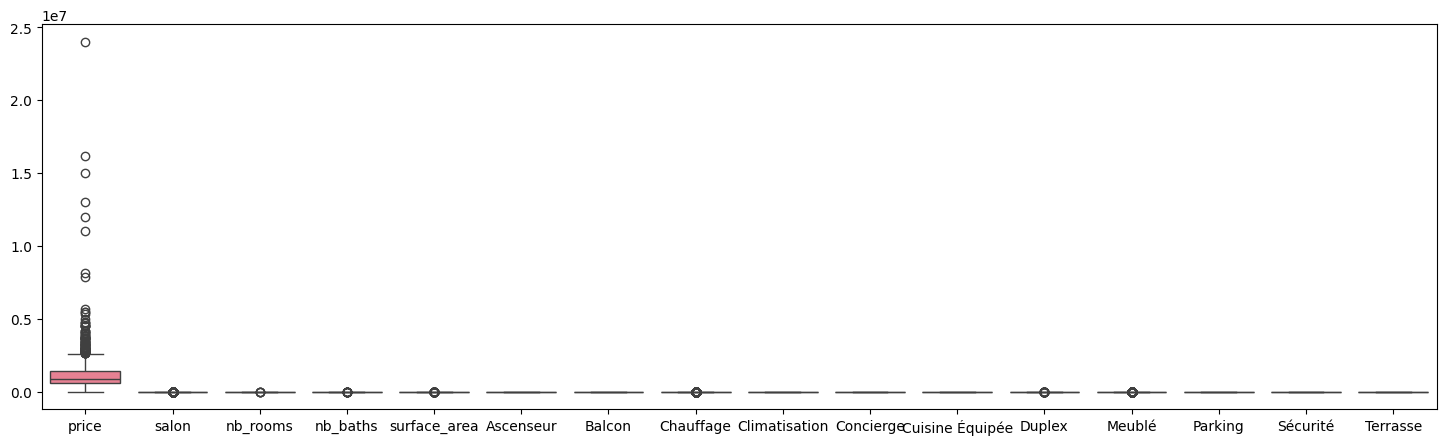

In [21]:
plt.figure(figsize=(18,5))
sns.boxplot(df)
plt.show()

- Détection et suppression des valeurs aberrantes par la méthode IQR


In [22]:
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1

Borne_min = Q1 - 1.5 * IQR
Borne_max = Q3 + 1.5 * IQR

Outliers = df[(df["price"] < Borne_min) | (df["price"] > Borne_max)]
print("Les valeurs extrêmes dans la colonne 'price' sont :")
print(Outliers["price"])

df_outliers_imputés = df.copy()

Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1

seuil_bas = Q1 - 1.5 * IQR
seuil_haut= Q3 + 1.5 * IQR

df_outliers_imputés = df[(df["price"] >= seuil_bas) & (df["price"] <= seuil_haut)]
print(df["price"])
print(df.shape)



Les valeurs extrêmes dans la colonne 'price' sont :
4       3100000.0
5       3200000.0
23      5500000.0
65      2850000.0
78      2900000.0
          ...    
1612    3300000.0
1621    3000000.0
1638    3600000.0
1721    3800000.0
1754    3300000.0
Name: price, Length: 96, dtype: float64
0       2000000.0
1       1195000.0
2       1350000.0
3        900000.0
4       3100000.0
          ...    
1765     300000.0
1766       3500.0
1767     700000.0
1771     700000.0
1772    1200000.0
Name: price, Length: 1490, dtype: float64
(1490, 17)


-  visualiser les outliers présents dans les colonnes numériques de df_outliers_imputés (NV DATAFRAME)




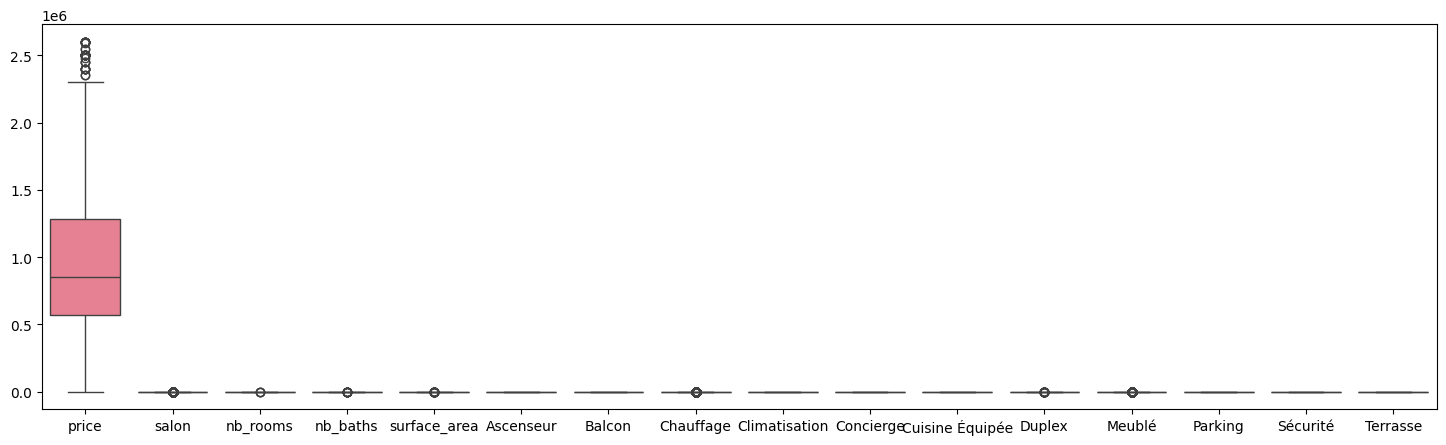

In [23]:
plt.figure(figsize=(18,5))
sns.boxplot(df_outliers_imputés)
plt.show()

- Encodage de la variable city_name avec LabelEncoder

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_outliers_imputés["city_name"] = le.fit_transform(df_outliers_imputés["city_name"])
print(df_outliers_imputés["city_name"])


0       12
1       12
2       14
3       12
6       30
        ..
1765    34
1766    58
1767    53
1771    12
1772    55
Name: city_name, Length: 1394, dtype: int64


/tmp/ipython-input-24-1034397818.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outliers_imputés["city_name"] = le.fit_transform(df_outliers_imputés["city_name"])


- Mise à l’échelle des variables numériques

In [25]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df_outliers_imputés[colonnes_numeriques]=MinMaxScaler().fit_transform(df_outliers_imputés[colonnes_numeriques])

/tmp/ipython-input-25-2632551842.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outliers_imputés[colonnes_numeriques]=MinMaxScaler().fit_transform(df_outliers_imputés[colonnes_numeriques])


- Affichage du jeu de données final après prétraitement



In [26]:
df_outliers_imputés

,price,city_name,salon,nb_rooms,nb_baths,surface_area,Ascenseur,Balcon,Chauffage,Climatisation,Concierge,Cuisine Équipée,Duplex,Meublé,Parking,Sécurité,Terrasse
0,2000000.0,12,0.25,0.166667,0.014925,0.418546,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1195000.0,12,0.25,0.166667,0.014925,0.243108,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1350000.0,14,0.25,0.166667,0.014925,0.200501,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
3,900000.0,12,0.25,0.000000,0.007463,0.137845,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
6,760000.0,30,0.25,0.333333,0.022388,0.243108,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1765,300000.0,34,0.25,0.333333,0.007463,0.147870,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1766,3500.0,58,0.25,0.166667,0.014925,0.210526,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1767,700000.0,53,0.25,0.166667,0.007463,0.172932,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1771,700000.0,12,0.25,0.166667,0.014925,0.208020,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


**Feature Engineering:**
- Le Feature Engineering (ou ingénierie des variables) a pour objectif de
créer, transformer ou sélectionner des variables (features) à partir des données brutes, afin d’améliorer la performance des modèles de Machine Learning.

**🔍 En résumé :**
- Transformer les données de manière intelligente pour révéler des informations pertinentes et exploitables par les algorithmes d’apprentissage.

In [27]:

df_fe = df_outliers_imputés.copy()

#  Création d'un score de confort basé sur les commodités
df_fe["comfort_score"] = (df_fe["Chauffage"] + df_fe["Climatisation"] + df_fe["Concierge"]).astype(int)

#  Score de standing basé sur équipements de luxe
df_fe["luxury_score"] = (df_fe["Ascenseur"] + df_fe["Parking"] + df_fe["Terrasse"]).astype(int)

#  Interaction entre variables fortement corrélées
df_fe["surface_x_rooms"] = df_fe["surface_area"] * df_fe["nb_rooms"]
df_fe["surface_per_room"] = df_fe["surface_area"] / (df_fe["nb_rooms"] + 1)

#  Transformation quadratique pour capter des relations non-linéaires
df_fe["surface_area_squared"] = df_fe["surface_area"] ** 2
df_fe["nb_rooms_squared"] = df_fe["nb_rooms"] ** 2

#  Catégorisation du prix (bining)
df_fe["price_category"] = pd.cut(df_fe["price"], bins=5, labels=["Très bas", "Bas", "Moyen", "Élevé", "Très élevé"])
df_fe["price_category_encoded"] = df_fe["price_category"].cat.codes

#  Score combiné global de qualité
df_fe["quality_score"] = (df_fe["comfort_score"] * 1.5 +
                          df_fe["luxury_score"] * 2 +
                          df_fe["surface_x_rooms"] * 0.01)

print(" Nouvelles variables créées avec succès")


 Nouvelles variables créées avec succès


- Identifier les variables explicatives les plus influentes sur le prix (corrélation > 0.15)

In [28]:
df_outliers_imputés=df_fe
colonnes_numeriques = df_outliers_imputés.select_dtypes(include=['number'])
correlations = colonnes_numeriques.corr()['price'].drop('price')
variables_corrélées=correlations[abs(correlations)>0.15]
print(variables_corrélées)

salon                     0.170595
nb_rooms                  0.293186
surface_area              0.519679
Ascenseur                 0.333753
Chauffage                 0.190903
Climatisation             0.226307
Concierge                 0.214288
Parking                   0.243903
Terrasse                  0.189927
comfort_score             0.265048
luxury_score              0.333941
surface_x_rooms           0.391176
surface_per_room          0.521485
surface_area_squared      0.434356
nb_rooms_squared          0.269538
price_category_encoded    0.964501
quality_score             0.345399
Name: price, dtype: float64


- Vérification de la redondance entre les variables explicatives sélectionnées



*   Visualiser la corrélation entre les variables explicatives sélectionnées




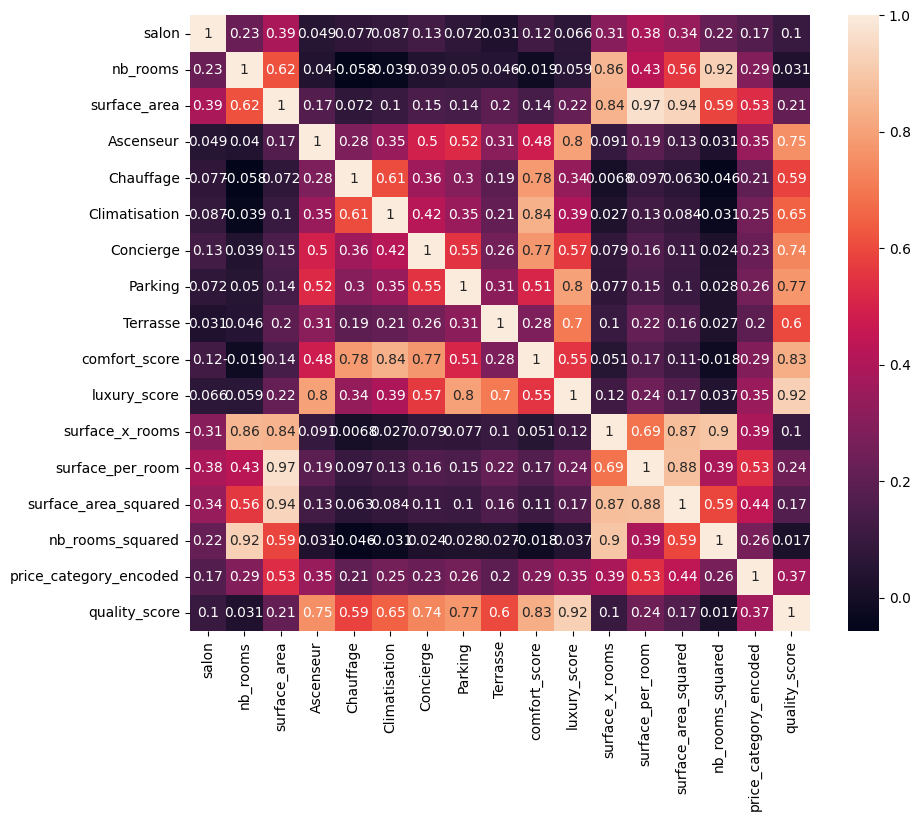

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_outliers_imputés[variables_corrélées.index.tolist()].corr(), annot=True)
plt.show()

- Sélection des variables explicatives (X) et de la variable cible (Y)
Définir manuellement les variables explicatives à conserver (en ignorant certaines comme le chauffage ou la clim qui sont fortement corrélées entre elles afin d’éviter la redondance et le multicolinéarité dans le modèle.)
Définir X (features) et Y (target)

In [30]:
# variables_corrélées = variables_corrélées[variables_corrélées.index.isin(df_outliers_imputés.columns)]
# colonnes_sans_chauffage_ni_climatisation = [
#     # 'salon',
#     # 'nb_rooms',
#     # 'Climatisation',
#     'nb_baths',
#     'surface_area',
#     'Ascenseur',
#     'Parking',
#     'Terrasse',
#     'Chauffage'
# ]
# X = df_outliers_imputés[colonnes_sans_chauffage_ni_climatisation]
# Y = df_outliers_imputés["price"]

In [31]:
# Filtrer les variables corrélées pour ne garder que celles présentes dans df_outliers_imputés

# Définir les variables explicatives et la variable cible
X = df_outliers_imputés[variables_corrélées.index.drop('Climatisation')]
Y = df_outliers_imputés["price"]

- Séparation des données en ensembles d'entraînement et de test
On divise les données en deux ensembles :

1.   Entraînement (80%) : pour entraîner les modèles
2.   Test (20%) : pour évaluer la performance des modèles sur des données non vues





In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=42)

- Import des métriques d’évaluation
Pour évaluer la performance des modèles de régression, on importe les métriques suivantes :

1. Mean Squared Error (MSE) : moyenne des carrés des erreurs (plus elle est faible, mieux c’est)

2. Mean Absolute Error (MAE) : moyenne des erreurs absolues

3. R² Score : coefficient de détermination, indique la proportion de variance expliquée par le modèle (plus proche de 1, mieux c’est)

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


- Entraînement et évaluation d’un modèle de Régression Linéaire

In [34]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(X_train,Y_train)
Y_pred1=model1.predict(X_test)
RMSE1 = np.sqrt(mean_squared_error(Y_test, Y_pred1))
MAE1=mean_absolute_error(Y_test, Y_pred1)
r2_score1=r2_score(Y_test, Y_pred1)
# print("RMSE of LinearRegression :",RMSE1,"MAE of LinearRegression :" ,MAE1,"R² of LinearRegression :",r2_score1)
print(f"LinearRegression:\n  RMSE: {RMSE1:.4f}\n  MAE: {MAE1:.4f}\n  R²: {r2_score1:.4f}")


LinearRegression:
  RMSE: 157895.4184
  MAE: 135308.1536
  R²: 0.9257


- Entraînement et évaluation d’un modèle de RandomForestRegressor

In [35]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor()
model2.fit(X_train, Y_train)
Y_pred2 = model2.predict(X_test)
RMSE2 = np.sqrt(mean_squared_error(Y_test, Y_pred2))
MAE2 = mean_absolute_error(Y_test, Y_pred2)
r2_score2 = r2_score(Y_test, Y_pred2)
print(f"\nRandomForestRegressor:\n  RMSE: {RMSE2:.4f}\n  MAE: {MAE2:.4f}\n  R²: {r2_score2:.4f}")


RandomForestRegressor:
  RMSE: 141638.0996
  MAE: 110861.1749
  R²: 0.9402


- Entraînement et évaluation d’un modèle de SVR

In [36]:
from sklearn.svm import SVR
model3 = SVR()
model3.fit(X_train, Y_train)
Y_pred3 = model3.predict(X_test)
RMSE3 = np.sqrt(mean_squared_error(Y_test, Y_pred3))
MAE3 = mean_absolute_error(Y_test, Y_pred3)
r2_score3 = r2_score(Y_test, Y_pred3)
print(f"\nSVR (Support Vector Regressor):\n  RMSE: {RMSE3:.4f}\n  MAE: {MAE3:.4f}\n  R²: {r2_score3:.4f}")



SVR (Support Vector Regressor):
  RMSE: 587291.4286
  MAE: 448095.8247
  R²: -0.0275


- Entraînement et évaluation d’un modèle de GradientBoostingRegressor

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
model4 = GradientBoostingRegressor()
model4.fit(X_train, Y_train)
Y_pred4 = model4.predict(X_test)
RMSE4 = np.sqrt(mean_squared_error(Y_test, Y_pred4))
MAE4 = mean_absolute_error(Y_test, Y_pred4)
r2_score4 = r2_score(Y_test, Y_pred4)
print(f"\nGradientBoostingRegressor:\n  RMSE: {RMSE4:.4f}\n  MAE: {MAE4:.4f}\n  R²: {r2_score4:.4f}")


GradientBoostingRegressor:
  RMSE: 137139.1364
  MAE: 112256.6130
  R²: 0.9440


Validation croisée des modèles de régression
La validation croisée (cross-validation) permet d’évaluer la performance des modèles sur plusieurs sous-ensembles des données.

1. Ici, on utilise 5 plis (cv=5).

2. La métrique utilisée est le coefficient de détermination R².

3. Cela donne une idée plus fiable de la robustesse des modèles avant de les tester sur un jeu séparé.

In [38]:
from sklearn.model_selection import cross_val_score

models = [model1, model2, model3, model4]
model_names = ["LinearRegression", "RandomForestRegressor", "SVR", "GradientBoostingRegressor"]

for name, model in zip(model_names, models):
    scores = cross_val_score(model, X, Y, cv=5, scoring='r2')
    print(f"{name} - Scores R² par pli: {scores}")
    print(f"{name} - Moyenne R²: {scores.mean():.4f}\n")


LinearRegression - Scores R² par pli: [0.92669732 0.91490967 0.93659164 0.93821073 0.91751014]
LinearRegression - Moyenne R²: 0.9268

RandomForestRegressor - Scores R² par pli: [0.93936025 0.91490869 0.94792254 0.94455628 0.91849906]
RandomForestRegressor - Moyenne R²: 0.9330

SVR - Scores R² par pli: [-0.11533469 -0.03977187 -0.06207765 -0.05051995 -0.00056329]
SVR - Moyenne R²: -0.0537

GradientBoostingRegressor - Scores R² par pli: [0.94335225 0.93026327 0.94954968 0.95225612 0.9266223 ]
GradientBoostingRegressor - Moyenne R²: 0.9404



In [39]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# 1. Standardiser les données (important pour les modèles linéaires avec régularisation)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# 2. Définir le modèle Ridge
ridge = Ridge()

# 3. Définir la grille d'hyperparamètres à tester
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'fit_intercept': [True, False]
}

# 4. Créer l'objet GridSearchCV
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# 5. Lancer la recherche sur les données d'entraînement
grid_search.fit(X_scaled, Y_train)

# 6. Résultats
print("Meilleurs hyperparamètres :", grid_search.best_params_)
print("Meilleur score MSE (négatif) :", grid_search.best_score_)

# 7. Prédiction avec le meilleur modèle
best_model = grid_search.best_estimator_
y_pred = best_model.predict(scaler.transform(X_test))

print("R² :", r2_score(Y_test, Y_pred1))
print("RMSE:", np.sqrt(mean_squared_error(Y_test, Y_pred1)))
print("MAE:", mean_absolute_error(Y_test, Y_pred1))
print("R²:", r2_score(Y_test, Y_pred1))

Meilleurs hyperparamètres : {'alpha': 10, 'fit_intercept': True}
Meilleur score MSE (négatif) : -22000207023.216156
R² : 0.9257335338114523
RMSE: 157895.41843946994
MAE: 135308.15360920964
R²: 0.9257335338114523


In [40]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline


In [41]:
# Définir le modèle
rf = RandomForestRegressor()

# Grille des hyperparamètres
param_dist_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# RandomizedSearchCV
search_rf = RandomizedSearchCV(rf, param_distributions=param_dist_rf, n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42)
search_rf.fit(X_train, Y_train)

# Résultats
print("🔹 Random Forest meilleurs paramètres:", search_rf.best_params_)
Y_pred_rf = search_rf.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(Y_test, Y_pred_rf)))
print("MAE:", mean_absolute_error(Y_test, Y_pred_rf))
print("R²:", r2_score(Y_test, Y_pred_rf))

🔹 Random Forest meilleurs paramètres: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 10}
RMSE: 139805.61108819867
MAE: 110009.10159148925
R²: 0.941775883573596


In [42]:
# Pipeline = standardisation + SVR
pipeline_svr = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

# Grille des hyperparamètres SVR
param_dist_svr = {
    'svr__C': [0.1, 1, 10, 100],
    'svr__epsilon': [0.01, 0.1, 0.2, 0.5],
    'svr__kernel': ['rbf', 'linear'],
    'svr__gamma': ['scale', 'auto']
}

# RandomizedSearchCV
search_svr = RandomizedSearchCV(pipeline_svr, param_distributions=param_dist_svr, n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42)
search_svr.fit(X_train, Y_train)

# Résultats
print("🔹 SVR meilleurs paramètres:", search_svr.best_params_)
Y_pred_svr = search_svr.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(Y_test, Y_pred_svr)))
print("MAE:", mean_absolute_error(Y_test, Y_pred_svr))
print("R²:", r2_score(Y_test, Y_pred_svr))

🔹 SVR meilleurs paramètres: {'svr__kernel': 'linear', 'svr__gamma': 'scale', 'svr__epsilon': 0.5, 'svr__C': 100}
RMSE: 447667.96863995504
MAE: 320727.12175713776
R²: 0.40301180350011856


In [43]:
# Modèle
gbr = GradientBoostingRegressor()

# Grille
param_dist_gbr = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'subsample': [0.6, 0.8, 1.0]
}

# RandomizedSearchCV
search_gbr = RandomizedSearchCV(gbr, param_distributions=param_dist_gbr, n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42)
search_gbr.fit(X_train, Y_train)

# Résultats
print("🔹 Gradient Boosting meilleurs paramètres:", search_gbr.best_params_)
Y_pred_gbr = search_gbr.predict(X_test)
print("R²:", r2_score(Y_test, Y_pred_gbr))
print("RMSE:", np.sqrt(mean_squared_error(Y_test, Y_pred_gbr)))
print("MAE:", mean_absolute_error(Y_test, Y_pred_gbr))

🔹 Gradient Boosting meilleurs paramètres: {'subsample': 0.8, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 3, 'learning_rate': 0.05}
R²: 0.944821585004635
RMSE: 136099.88536115506
MAE: 113105.88535726372


**Sauvegarder le modèle entraîné**

In [44]:
import joblib
joblib.dump(gbr, 'model.pkl')

['model.pkl']